In [1]:
import numpy as np
from copy import copy
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

In [2]:
corners = [[-1,0.5,0.5], [+1,0.5,0.5], [0,-0.5,0.5], [0,0.5,-0.5]]
face1 = [ corners[0], corners[1], corners[2] ] 
face2 = [ corners[0], corners[1], corners[3] ] 
face3 = [ corners[0], corners[2], corners[3] ] 
face4 = [ corners[1], corners[2], corners[3] ]
vertices = np.array([face1,face2,face3,face4],dtype=float)

## Rotation

In [3]:
alpha = np.pi/6
R = np.array([[np.cos(alpha), -np.sin(alpha), 0], [np.sin(alpha), np.cos(alpha), 0], [0,0,1]])

In [4]:
V = np.transpose(vertices)
U = np.matmul(R, V)
rotated_vertices = np.transpose(U)

In [5]:
rotated_vertices

array([[[-1.3660254,  0.1830127,  0.1830127],
        [ 0.3660254,  0.6830127,  0.6830127],
        [ 0.       , -0.5      ,  0.5      ]],

       [[-1.3660254,  0.1830127,  0.1830127],
        [ 0.3660254,  0.6830127,  0.6830127],
        [ 0.       ,  0.5      , -0.5      ]],

       [[-0.8660254,  0.6830127,  0.1830127],
        [-0.5      , -0.1830127,  0.6830127],
        [ 0.       ,  0.5      , -0.5      ]],

       [[ 0.8660254,  0.6830127,  0.1830127],
        [ 0.5      , -0.1830127,  0.6830127],
        [ 0.       ,  0.5      , -0.5      ]]])

## Translation

In [6]:
translated_vertices = vertices + np.array([1,0,0])

In [7]:
translated_vertices

array([[[ 0. ,  0.5,  0.5],
        [ 2. ,  0.5,  0.5],
        [ 1. , -0.5,  0.5]],

       [[ 0. ,  0.5,  0.5],
        [ 2. ,  0.5,  0.5],
        [ 1. ,  0.5, -0.5]],

       [[ 0. ,  0.5,  0.5],
        [ 1. , -0.5,  0.5],
        [ 1. ,  0.5, -0.5]],

       [[ 2. ,  0.5,  0.5],
        [ 1. , -0.5,  0.5],
        [ 1. ,  0.5, -0.5]]])

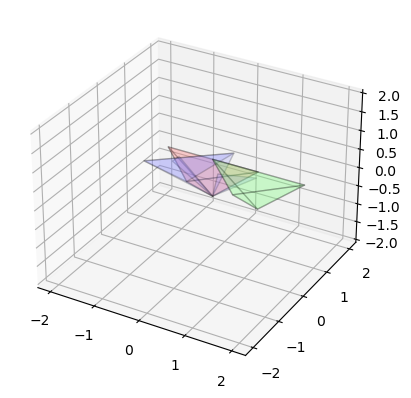

In [11]:
plt.ion()
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

obj1 = Poly3DCollection(vertices, linewidths=1, alpha=0.2)
obj2 = Poly3DCollection(translated_vertices, linewidths=1, alpha=0.2)
obj3 = Poly3DCollection(rotated_vertices, linewidths=1, alpha=0.2)
obj1.set_facecolor([1, 0.5, 0.5])
obj2.set_facecolor([0.5, 1, 0.5])
obj3.set_facecolor([0.5, 0.5, 1])
obj1.set_edgecolor([0,0,0])
obj2.set_edgecolor([0,0,0])
obj3.set_edgecolor([0,0,0])
ax.add_collection3d(obj1)
ax.add_collection3d(obj2)
ax.add_collection3d(obj3)

s = [-2,-2,-2,2,2,2]
ax.auto_scale_xyz(s,s,s)

plt.show()

## Homogeneous Coordinates

In [12]:
vertices.shape

(4, 3, 3)

In [78]:
corners = [[-1,0.5,0.5], [+1,0.5,0.5], [0,-0.5,0.5], [0,0.5,-0.5]]
face1 = [ corners[0], corners[1], corners[2] ] 
face2 = [ corners[0], corners[1], corners[3] ] 
face3 = [ corners[0], corners[2], corners[3] ] 
face4 = [ corners[1], corners[2], corners[3] ]
vertices = np.array([
    corners[0], corners[1], corners[2],
    corners[0], corners[1], corners[3],
    corners[0], corners[2], corners[3],
    corners[1], corners[2], corners[3]],dtype=float)

In [79]:
hvertices = np.hstack([vertices, np.ones([12,1])])

In [80]:
hvertices

array([[-1. ,  0.5,  0.5,  1. ],
       [ 1. ,  0.5,  0.5,  1. ],
       [ 0. , -0.5,  0.5,  1. ],
       [-1. ,  0.5,  0.5,  1. ],
       [ 1. ,  0.5,  0.5,  1. ],
       [ 0. ,  0.5, -0.5,  1. ],
       [-1. ,  0.5,  0.5,  1. ],
       [ 0. , -0.5,  0.5,  1. ],
       [ 0. ,  0.5, -0.5,  1. ],
       [ 1. ,  0.5,  0.5,  1. ],
       [ 0. , -0.5,  0.5,  1. ],
       [ 0. ,  0.5, -0.5,  1. ]])

In [81]:
a = np.array([[1,1,0]])
H1 = np.hstack([R, np.transpose(a)])
H = np.vstack([H1, np.array([0,0,0,1])])

In [82]:
new_hvertices = np.transpose(np.matmul( H, np.transpose(hvertices)))

In [85]:
new_vertices = new_hvertices[:,:3]
new_vertices

array([[-0.1160254,  0.9330127,  0.5      ],
       [ 1.6160254,  1.9330127,  0.5      ],
       [ 1.25     ,  0.5669873,  0.5      ],
       [-0.1160254,  0.9330127,  0.5      ],
       [ 1.6160254,  1.9330127,  0.5      ],
       [ 0.75     ,  1.4330127, -0.5      ],
       [-0.1160254,  0.9330127,  0.5      ],
       [ 1.25     ,  0.5669873,  0.5      ],
       [ 0.75     ,  1.4330127, -0.5      ],
       [ 1.6160254,  1.9330127,  0.5      ],
       [ 1.25     ,  0.5669873,  0.5      ],
       [ 0.75     ,  1.4330127, -0.5      ]])

## STL files and the STL Library

In [87]:
from stl import mesh

In [90]:
vertices = np.array(corners)
face1 = [0,1,2]
face2 = [0,1,3]
face3 = [0,2,3]
face4 = [1,2,3]
faces = np.array( [face1, face2, face3, face4 ])

In [91]:
faces

array([[0, 1, 2],
       [0, 1, 3],
       [0, 2, 3],
       [1, 2, 3]])

In [94]:
th = mesh.Mesh(np.zeros(faces.shape[0], dtype=mesh.Mesh.dtype))
for i, f in enumerate(faces):
    for j in range(3):
        print( (i,j), vertices[f[j], :])
        th.vectors[i][j] = vertices[f[j]]

th.save('tetrahedron.stl')

(0, 0) [-1.   0.5  0.5]
(0, 1) [1.  0.5 0.5]
(0, 2) [ 0.  -0.5  0.5]
(1, 0) [-1.   0.5  0.5]
(1, 1) [1.  0.5 0.5]
(1, 2) [ 0.   0.5 -0.5]
(2, 0) [-1.   0.5  0.5]
(2, 1) [ 0.  -0.5  0.5]
(2, 2) [ 0.   0.5 -0.5]
(3, 0) [1.  0.5 0.5]
(3, 1) [ 0.  -0.5  0.5]
(3, 2) [ 0.   0.5 -0.5]


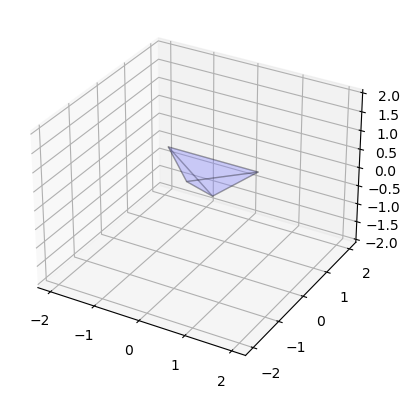

In [97]:
obj = Poly3DCollection(th.vectors, linewidths=1, alpha=0.2)
obj.set_facecolor([0.5,0.5,1])
obj.set_edgecolor([0,0,0])

plt.ion()
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.add_collection3d(obj)

s = [-2,-2,-2,2,2,2]
ax.auto_scale_xyz(s,s,s)

plt.show()

In [98]:
th.vectors.shape

(4, 3, 3)

In [99]:
th.vectors.reshape(12,3)

array([[-1. ,  0.5,  0.5],
       [ 1. ,  0.5,  0.5],
       [ 0. , -0.5,  0.5],
       [-1. ,  0.5,  0.5],
       [ 1. ,  0.5,  0.5],
       [ 0. ,  0.5, -0.5],
       [-1. ,  0.5,  0.5],
       [ 0. , -0.5,  0.5],
       [ 0. ,  0.5, -0.5],
       [ 1. ,  0.5,  0.5],
       [ 0. , -0.5,  0.5],
       [ 0. ,  0.5, -0.5]], dtype=float32)